In [1]:
import numpy as np
import pandas as pd
import os
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [61]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

IMG_SHAPE = (150, 150, 3)

base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,)

x = base_model.output
x = layers.Flatten()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
predictions = layers.Dense(2, activation='sigmoid')(x)

model = models.Model(base_model.input, predictions)
last_conv_layer = model.get_layer('block5_conv4')

In [62]:
model.load_weights("VGG19_CAT_AND_DOGS_BEST.h5py")

In [63]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [65]:
path = r"E:\Data\DogAndCats\cats_and_dogs_filtered\validation\dogs"
path2 = r"E:\Data\DogAndCats\cats_and_dogs_filtered\validation\cats"

img_path1 = "{}\dog.2374.jpg".format(path)
img_path2 = "{}\dog.2351.jpg".format(path)
img_path3 = "{}\dog.2008.jpg".format(path)
img_path4 = "{}\cat.2092.jpg".format(path2)
img_path5 = "{}\cat.2192.jpg".format(path2)
img_path6 = "{}\cat.2123.jpg".format(path2)

In [66]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [95]:
def show_superimposed_image(img_path, heatmap):
    img = cv2.imread(img_path)
    # resize the heatmap to be the same size as the original image
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img
    plt.imshow((superimposed_img).astype(np.uint64))

In [96]:
def process_image(img_path, last_conv_layer, idx=0):
    label = ['cat','dog']
    img = image.load_img(img_path, target_size=(150, 150))
    
    plt.imshow(img)
    plt.grid(None)
    plt.show()
      
    x = np.array(img)
    x = x.reshape(1,150,150,3) / 255
      
    preds = model.predict(x)
    print('Predicted:', label[np.argmax(preds)])

    #class_index = np.argmax(preds)

    class_index = np.argsort(preds[0])[-(1+idx)]

    class_output = model.output[:, class_index]

    grads = K.gradients(class_output, last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([x])

    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    plt.matshow(heatmap)
    plt.grid(None)
    plt.show()
      #
    show_superimposed_image(img_path, heatmap)

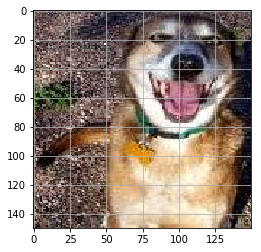

Predicted: dog


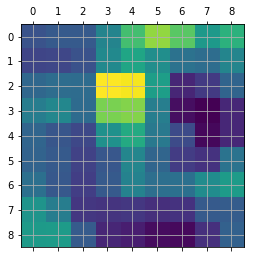

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


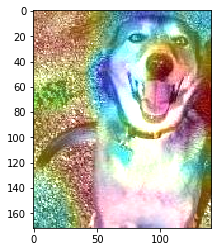

In [97]:
process_image(img_path1, last_conv_layer, idx=0)

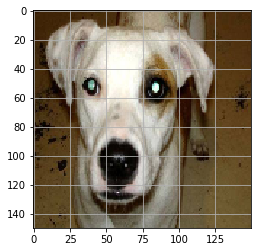

Predicted: dog


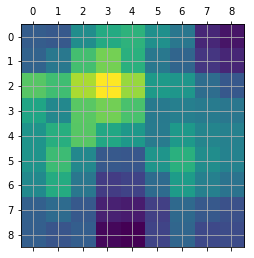

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


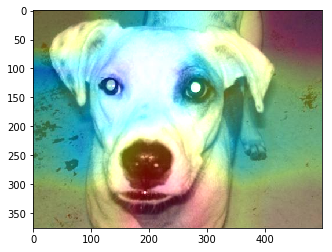

In [98]:
process_image(img_path2, last_conv_layer, idx=0)

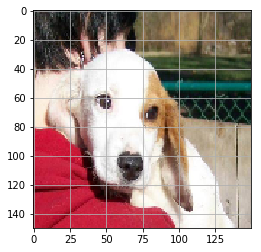

Predicted: dog


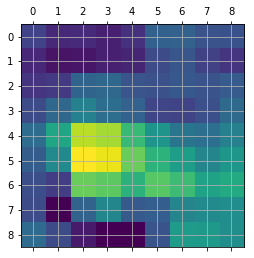

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


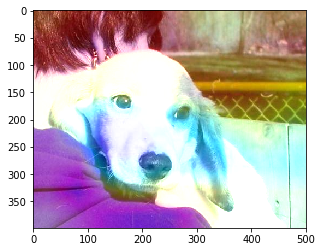

In [85]:
process_image(img_path3, last_conv_layer, idx=0)

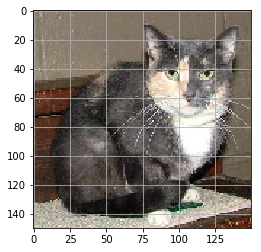

Predicted: cat


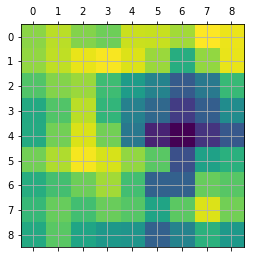

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


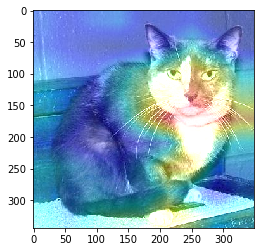

In [86]:
process_image(img_path4, last_conv_layer, idx=1)

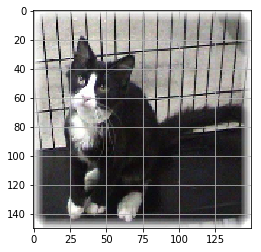

Predicted: cat


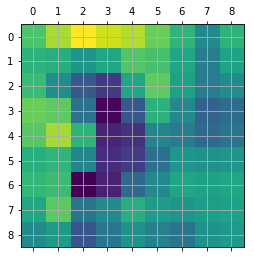

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


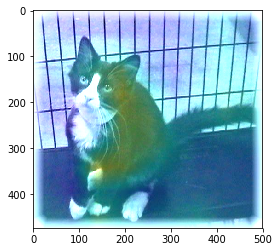

In [87]:
process_image(img_path5, last_conv_layer, idx=1)

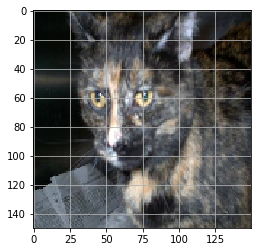

Predicted: cat


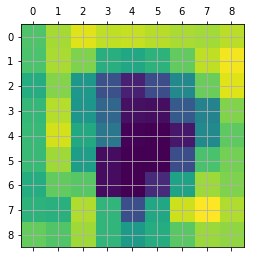

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


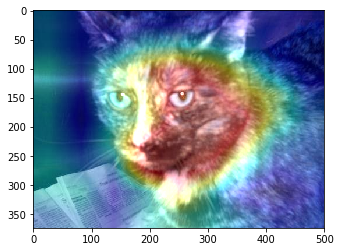

In [88]:
process_image(img_path6, last_conv_layer, idx=1)